<a href="https://colab.research.google.com/github/Terry-Migwi/Hypothesis_Testing/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_07_Terry_Migwi_Hypothesis_Testing_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Defining the Question

Is the demand (the number of cars taken) for the blue car higher in area codes that record more number of transactions?

Is the demand lower in area codes that record less number of transactions? 

How do we tell the demand for area codes that record the same number of transactions?



##Metrics of success

1) Determine the total number of area/postal codes recorded in the data i.e the population

2)Rank area codes in order of transactions recorded, from highest to lowest.  

3)Conduct hypothesis testing around the particular question and follow through the steps of hypothesis testing correctly

3)Choose the specific locations to work with i.e a sample

4)Choose a specific time period to work with

5)Make an appropriate conclusion and recommendations
 

##Context

Autolib is an electric car sharing company that rents out three types of cars i.e the bluecar, utilib and the utilib 14. The company operates in different area codes/locations in the city of Paris and runs throughout the week. As the data scientist of the company, I have conducted prior analysis and have found out that the blue car is the most popular in comparison to the utilib and the utilib 14 cars. However, some people still have a prefence for the utilib and the utilib 14 cars hence all three types of cars are still supplied to the different locations. 

The management would like to understand how to improve their supply of the blue car as it is the most popular so as to cater for the demands of the people in the city of Paris. At the moment, there is no way to tell how high or low the demand for the blue car is in a certain area code. For this reason, there is an assumption that the number of transactions recorded for a given area code reflects to the demand of the blue car in that area code. As the data scientist of the company, I would like to investigate that claim and also look into the following hypothesis: 

Is it correct to say that the demand for the blue car is higher in area codes that have more number of records and vice versa? If this claim is correct, how do we tell the difference in demand for the blue car where area codes have an equal number of transactions recorded? Do we assume that since the area codes have the same number of transactions recorded then the demand for the blue car is equal in those area codes?

By answering this question, I will help the management make better decisions when they are supplying/distributing the blue car to the different area codes. This will help avoid oversupply or undersupply of the blue car.

##Experimental Design

1) Importing necessary libraries and loading the datasets

2) Checking the packaging of my dataset to understand my data better

3) Data preparation and cleaning

4) Performing univarite analysis and recording the observations

5) Performing bivariate analysis and recording the observations

6) Conducting hypothesis tests to the population to investigate the claim

7) Getting a sample to represent my population 

8) Make a decision and conclusion

9) Giving Recommendations

##Data Relevance

The data available seems to have all necessary information I need to conduct my analysis.

###Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Loading the dataset

In [ ]:
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv') 


###Checking our dataset

In [ ]:
#checking the head of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#checking the tail of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#checking our columns
df.columns

#the dataset has a total of 13 columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#loading the dataset with the explanation on columns to get a better understanding of the columns
columns_df = pd.read_csv('/content/columns_explanation.csv')
columns_df

#the columns are clearly explained

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#checking if the columns have appropriate datatypes
df.dtypes

#some data types have to be changed 

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#checking the size of our dataset
df.shape
#our dataset has 13 columns and 16,085 rows

(16085, 13)

##Data Preparation: Cleaning our dataset

###Uniformity

In [ ]:
#standardizing the format of our column names 
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [ ]:
#changing a few column names to make them easier to read and manipulate
df = df.rename(columns = {'dayofweek':'day_of_week', 'n_daily_data_points':'daily_data_points'})
df.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
#since our 'date' column is in object data type, we need to change it to datetime datatype
df["date"]=pd.to_datetime(df['date'])

In [ ]:
#converting the 'postal_code' to object datatypes as I want to find out how many postal codes we have
df['postal_code']=df['postal_code'].astype('str')

In [ ]:
#checking the datatypes to confirm the changes made
df.dtypes

postal_code                       object
date                      datetime64[ns]
daily_data_points                  int64
day_of_week                        int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

###Consistency

In [ ]:
#checking for duplicated values
df[df.duplicated()]

#our dataset shows no inconsistencies as there are no duplicated values

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum


In [ ]:
#checking for unique values in our categorical columns
df.postal_code.unique()
df.postal_code.nunique()

#the company operates in 104 different area/postal codes in the city of Paris

104

In [ ]:
#checking for unique values in day_type column
df.day_type.unique()
df.day_type.nunique()

#there are only two day types i.e the weekend or weekdays

2

###Completeness

In [ ]:
#checking if we have missing values
df.isnull().values.any()

#there are no missing values in our dataset

False

In [ ]:
#confirming we have no missing values in our dataset
df.isna().sum()

#we are certain we have no missing values in our dataset hence we conclude our data is complete

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

###Checking for outliers

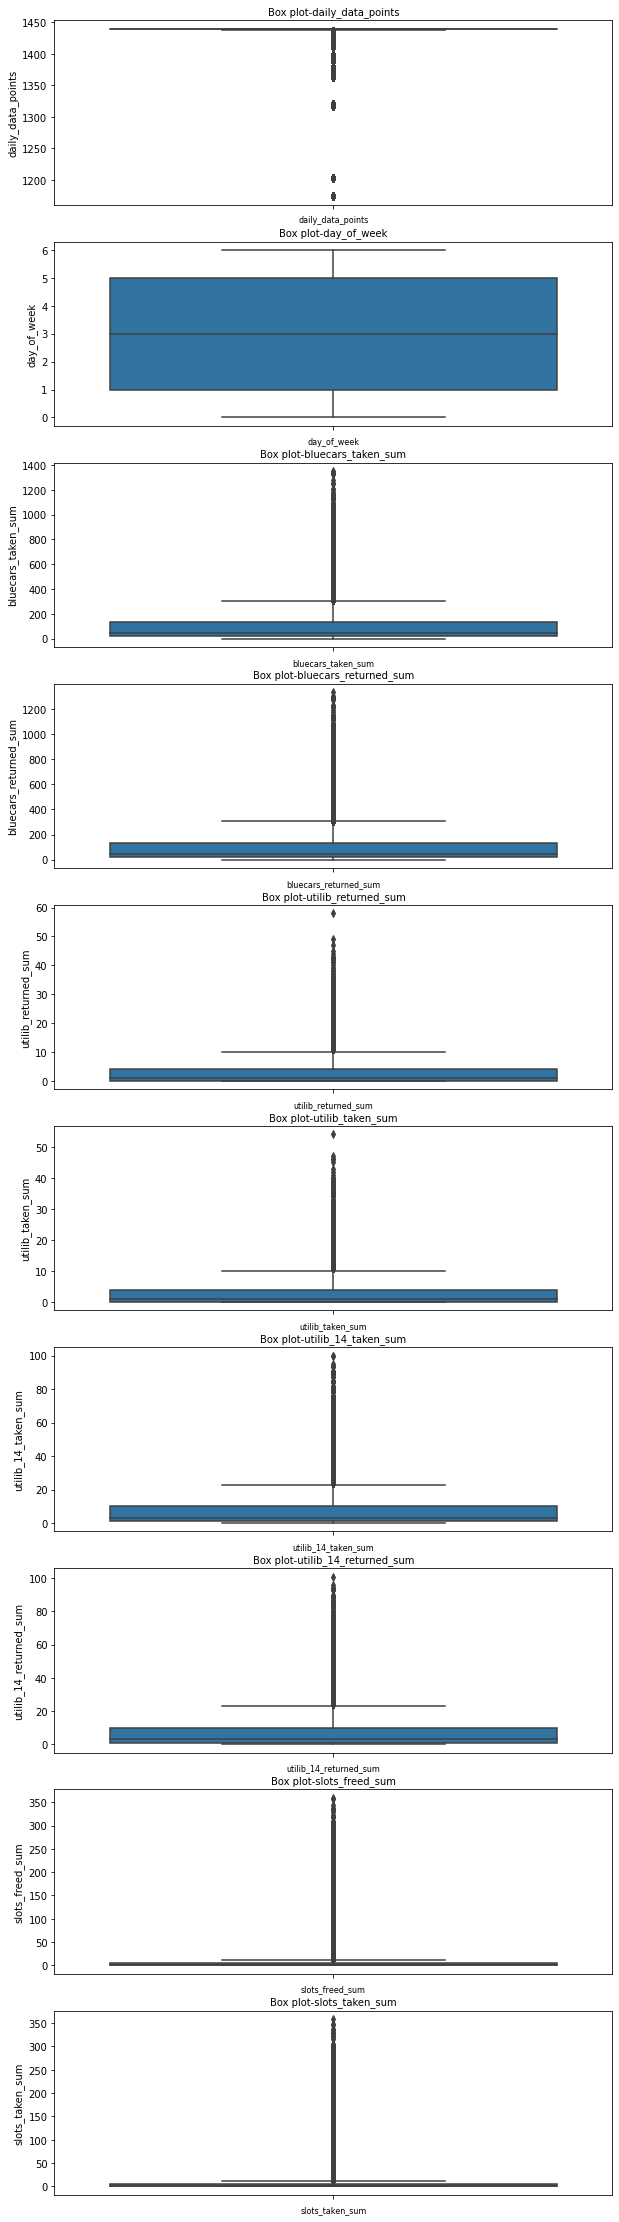

In [ ]:
#checking for outliers in all the numerical columns 
col_names = ['daily_data_points', 'day_of_week', 'bluecars_taken_sum','bluecars_returned_sum', 'utilib_returned_sum','utilib_taken_sum', 
             'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum']
            
fig, ax = plt.subplots(len(col_names), figsize = (10, 40))

for i, col_val in enumerate(col_names):

  sns.boxplot(y= df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

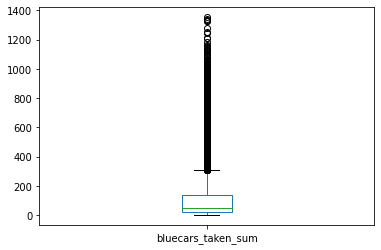

In [ ]:
#checking for outliers in the bluecar taken column
df.boxplot(['bluecars_taken_sum'], grid = False)

#we can observe major outliers in the bluecars taken column hence further investigation should be done 

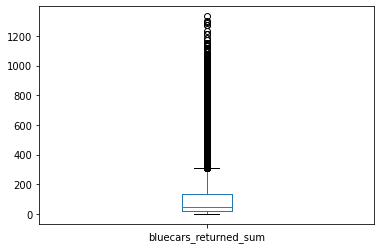

In [ ]:
#checking for outliers in the bluecar returned column
df.boxplot(['bluecars_returned_sum'], grid = False)

#we can observe major outliers in the bluecars returned hence further investigation should be conducted to find out why this is so

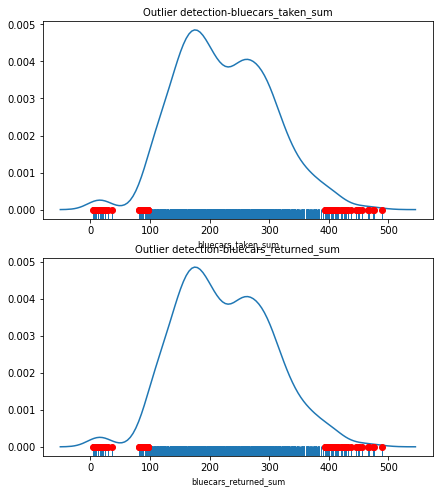

In [ ]:
#performing percentile based outlier removal in bluecars taken and bluecars returned
def Percentile_based_outlier (df, threshold = 95):
  diff = (100-threshold)/2
  minval, maxval = np.percentile(df,[diff,100-diff])
  return (df<minval) | (df>maxval)

col_names = ['bluecars_taken_sum','bluecars_returned_sum']
            
fig, ax = plt.subplots(len(col_names), figsize = (7, 8))

for i, col_val in enumerate(col_names):
  x = df[col_names][:1000]

  sns.distplot(x, ax=ax[i], rug = True, hist = False)
  outliers = x[Percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers),'ro', clip_on = False)
  ax[i].set_title('Outlier detection-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#both bluecars taken and bluecars returned columns follow the normal distibution
#both the columns are bimodal
#both columns show an equal number of outliers on both sides of the tails
#there are outliers that are below the 100 mark and those that are between the 400 and 500 mark

###Checking for Anomalies

In [ ]:
#we will check if there are any anomalies in the bluecars only 
#outliers in bluecars taken column
q1_bluecar_taken = df['bluecars_taken_sum'].quantile(.25)
q3_bluecar_taken = df['bluecars_taken_sum'].quantile(.75)
iqr_bluecar_taken = q3_bluecar_taken - q1_bluecar_taken
iqr_bluecar_taken

#we have 115 records that are out of the interquantile range hence we should look further into that

115.0

In [ ]:
#we will check if there are any anomalies in the bluecars only 
#outliers in bluecars returned column
q1_bluecar_returned = df['bluecars_returned_sum'].quantile(.25)
q3_bluecar_returned = df['bluecars_returned_sum'].quantile(.75)
iqr_bluecar_returned = q3_bluecar_returned - q1_bluecar_returned
iqr_bluecar_returned

#we have 115 records that are out of the interquantile range hence we should look further into that

115.0

##Cleaned dataset

In [ ]:
#creating a new cleaned df to conduct analysis
df1 = df

In [ ]:
#checking the info 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             16085 non-null  object        
 1   date                    16085 non-null  datetime64[ns]
 2   daily_data_points       16085 non-null  int64         
 3   day_of_week             16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   bluecars_taken_sum      16085 non-null  int64         
 6   bluecars_returned_sum   16085 non-null  int64         
 7   utilib_taken_sum        16085 non-null  int64         
 8   utilib_returned_sum     16085 non-null  int64         
 9   utilib_14_taken_sum     16085 non-null  int64         
 10  utilib_14_returned_sum  16085 non-null  int64         
 11  slots_freed_sum         16085 non-null  int64         
 12  slots_taken_sum         16085 non-null  int64 

##Analysis: Univariate Analysis

In [ ]:
#we will first view a summary of the statistics of our columns
df1.describe()

,daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


##Measures of Central Tendency

In [ ]:
#splitting the dataset into numerical columns and categorical columns for convenience
all_columns = list(df1.columns)      #creating a list of all columns
all_columns.remove('postal_code')    #removing postal code from the list
all_columns.remove('date')           #removing date from the list
all_columns.remove('day_type')       #removing day type from the list
numerical_columns = all_columns      #creating a list of all numerical columns
numerical_columns

['daily_data_points',
 'day_of_week',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [ ]:
#creating a list of all categorical columns
categorical_columns = ['postal_code', 'date', 'day_type']
categorical_columns

['postal_code', 'date', 'day_type']

###Median

In [ ]:
#finding median values for bluecars taken and bluecars returned columns
col_names = ['bluecars_taken_sum', 'bluecars_returned_sum']
for column in col_names:
  print('\n')
  print(column +':' + str(df1[column].median()))

#both columns have a median value of 46



bluecars_taken_sum:46.0


bluecars_returned_sum:46.0


###Mode

In [ ]:
#finding the mode of our columns of interest

for column in col_names:
  print('\n')
  print(column + ' : ' +str(df1[column].mode()))

#the number of bluecars taken most is 12
#the number of bluecars returned most is 13



bluecars_taken_sum : 0    12
dtype: int64


bluecars_returned_sum : 0    13
dtype: int64


###Mean

In [ ]:
#finding the mean values of the bluecar returned and the bluecar taken columns

for column in col_names:
  print('\n')
  print(column +' : '+str(df1[column].mean()))

#the mean value of the blue cars is 125.926
#the mean value of the bluecars is 125.912
#we note that the mean values are so close to each other which is expected



bluecars_taken_sum : 125.92695057506994


bluecars_returned_sum : 125.912713708424


###Range

In [ ]:
#finding the range of the two columns we are interested in
def calculate_range(column):                                  #deriving a function for calculating range of all columns
  maximum = df1[column].max()                                 #finding the maximum values
  minimum = df1[column].min()                                 #finding the minimum values
  column_range = maximum - minimum                            #calculating the range
  return column_range

for column in col_names:                               #using a for loop to caculate range values of all our numerical columns
  print('\n')                                                  #creating space for readability
  print(column +'- range: '+ str(calculate_range(column)))  #printing the calculated ranges of all the columns

#we notice a difference of 20 cars in the range of the two cars
#this could mean there are 20 cars that have been taken but have not been returned/ are yet to be returned
#this means we should re-check our records to confirm if this tallies



bluecars_taken_sum- range: 1352


bluecars_returned_sum- range: 1332


###Interquartile Range

In [ ]:
#calculating interquartile ranges for our columns

for column in col_names:
  print('\n')
  print((df[column].quantile([0.25, 0.5, 0.75])))

#our quantiles seem to tally which is good



0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64


0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64


##Measures of Dispersion
Variance, Standard deviation, Skewness and Kurtosis

In [ ]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in col_names:
  print('\n')
  print(column + ', variance: ' +str(df[column].var()))
  print(column + ', std_deviation: ' +str(df[column].std()))
  print(column + ', skewness: ' +str(df[column].skew()))
  print(column + ', kurtosis: ' +str(df[column].kurt()))

#the measures of dispersion from both columns don't vary as much
#the small variance could be attributed to the difference in range as had been observed 
#both columns show the data is skewed to the right and they both have fat tails
#the variance and standard deviation don't vary as much



bluecars_taken_sum, variance: 34383.01611333789
bluecars_taken_sum, std_deviation: 185.42657876727893
bluecars_taken_sum, skewness: 2.4063548974959086
bluecars_taken_sum, kurtosis: 6.172692305510042


bluecars_returned_sum, variance: 34410.819413706275
bluecars_returned_sum, std_deviation: 185.50153480148427
bluecars_returned_sum, skewness: 2.412084978838923
bluecars_returned_sum, kurtosis: 6.1862880957582345


##Histograms

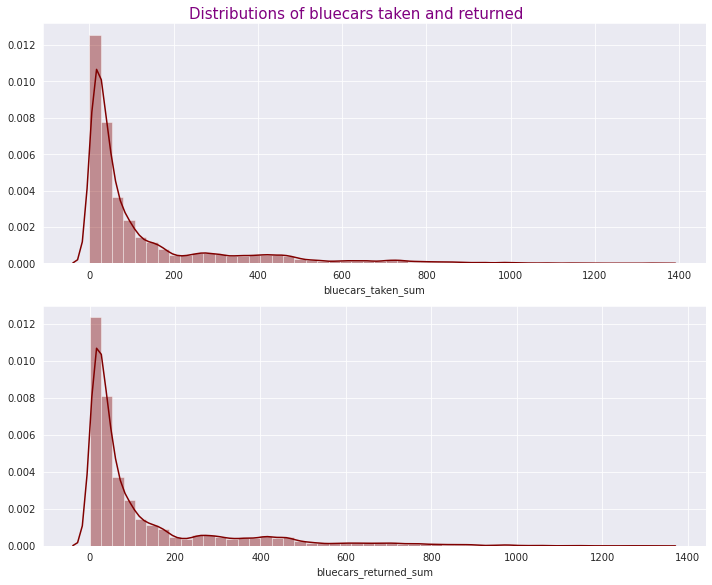

In [ ]:
#histograms for our columns of interest

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(col_names), figsize = (10, 8))
fig.suptitle('Distributions of bluecars taken and returned', y= 1.01, color = 'purple', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df1, col_names):
  sns.distplot(df1[name], ax = ax, kde = True, color = 'maroon')
plt.tight_layout()

#the distribution plots show the columns are both normally distributed
#both columns are skewed to the right

##Bar Charts

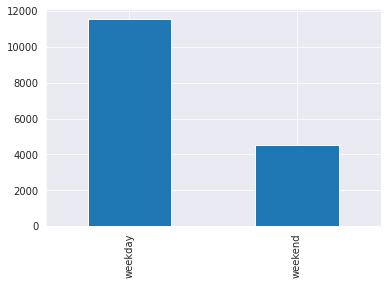

In [ ]:
#bar chart for day type
df1['day_type'].value_counts().head(10).plot.bar()

#we have more records for weekdays as compared to the weekend

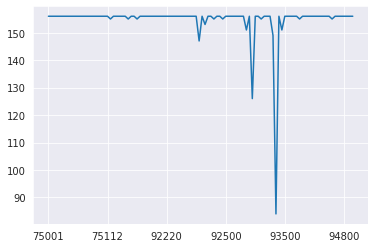

In [ ]:
#line chart of postal codes 
df1['postal_code'].value_counts().sort_index().plot.line()

#area/postal codes are distributed between 75001 and 94800
#we have a few downward spikes meaning some area codes might not be recorded 

##Bivariate Analysis

###Scatter plots for numerical columns

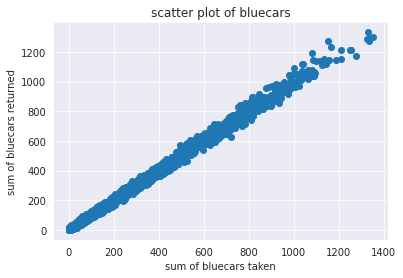

In [ ]:
#scatter plots for bluecars

plt.scatter(x = df1['bluecars_taken_sum'], y = df1['bluecars_returned_sum'])
plt.title('scatter plot of bluecars')
plt.xlabel('sum of bluecars taken')
plt.ylabel('sum of bluecars returned')
plt.show()

#we observe a linear relationship between the number of bluecars taken and returned

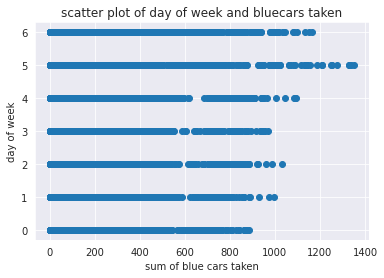

In [ ]:
#scatter plots for bluecars taken and day of the week
plt.scatter(x = df1['bluecars_taken_sum'], y = df1['day_of_week'])
plt.title('scatter plot of day of week and bluecars taken')
plt.xlabel('sum of blue cars taken')
plt.ylabel('day of week')
plt.show()

#we observe that most bluecars are taken on Saturday followed by Sunday and Friday
#We have the least number of blue cars being taken on Monday
#we observe that the bluecar is more popular over the weekend

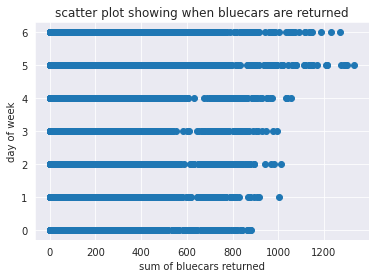

In [ ]:
#scatter plots for bluecars returned and day of the week
plt.scatter(x = df1['bluecars_returned_sum'], y = df1['day_of_week'])
plt.title('scatter plot showing when bluecars are returned')
plt.xlabel('sum of bluecars returned')
plt.ylabel('day of week')
plt.show()

#we observe the same trend from bluecars taken. This could mean the cars are returned the same day they are taken

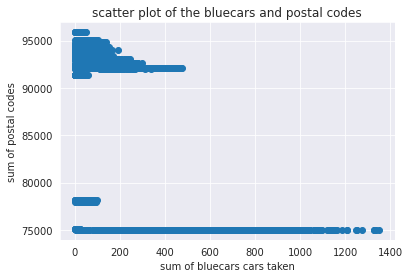

In [ ]:
#scatter plots for bluecars taken and postal codes to see which area codes the blue cars are most popular

#reconverting the 'postal_code' to int datatype for the purposes of this analysis
df['postal_code']=df['postal_code'].astype('int')


plt.scatter(x = df1['bluecars_taken_sum'], y = df1['postal_code'])
plt.title('scatter plot of the bluecars and postal codes')
plt.xlabel('sum of bluecars cars taken')
plt.ylabel('sum of postal codes')
plt.show()

#there is a non-linear relationship between postal code and the bluecars
#the bluecar is more popular in the 75000 postal codes
#the area codes 8000 - 90000 have no record of the bluecar. 
#area codes between 90000 and 95000 have a few records of the bluecar

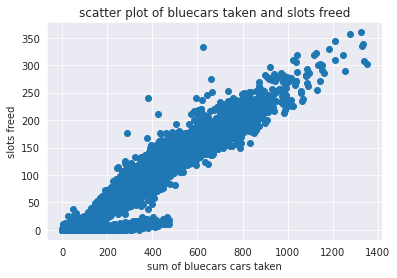

In [ ]:
#scatter plots for bluecars taken and slots freed
plt.scatter(x = df1['bluecars_taken_sum'], y = df1['slots_freed_sum'])
plt.title('scatter plot of bluecars taken and slots freed')
plt.xlabel('sum of bluecars cars taken')
plt.ylabel('slots freed')
plt.show()

#the relationship is almost linear between the number of bluecars taken and the slots freed

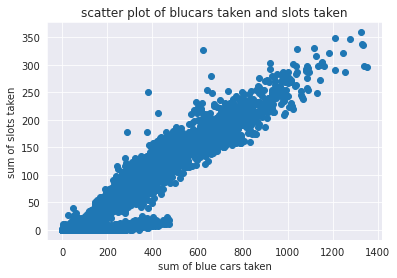

In [ ]:
#scatter plots for bluecars taken and slots taken
plt.scatter(x = df1['bluecars_taken_sum'], y = df1['slots_taken_sum'])
plt.title('scatter plot of blucars taken and slots taken')
plt.xlabel('sum of blue cars taken')
plt.ylabel('sum of slots taken')
plt.show()

#a pattern as the one for slots freed is observed

###Line graphs

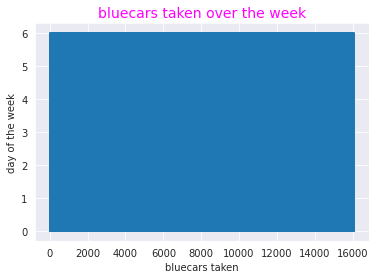

In [ ]:
#line graphs of the number of bluecars taken and the days of the week

df1['bluecars_taken_sum'], df1['day_of_week'].plot()
plt.title('bluecars taken over the week', fontsize = 14, color = 'magenta')
plt.ylabel('day of the week')
plt.xlabel('bluecars taken')
plt.show()

#bluecars taken seem to be popular throughout the week

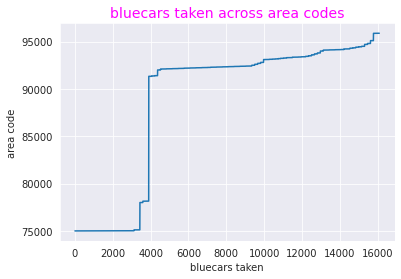

In [ ]:
#line graphs of the number of bluecars taken and postal codes

df1['bluecars_taken_sum'], df1['postal_code'].plot()
plt.title('bluecars taken across area codes', fontsize = 14, color = 'magenta')
plt.ylabel('area code')
plt.xlabel('bluecars taken')
plt.show()

#the blue car seems to be popular in area codes around 75000
#residents of area codes between 78000 and 92000 don't have a preference for the blue car
#there is some interest in the bluecar around the area codes 92000 and 95000

###Correlation

In [ ]:
#whats the correlation between the bluecar and postal codes
df1['bluecars_taken_sum'].corr(df1['postal_code'])

#there is a strong negative correlation between the postal codes and blue cars taken

-0.6980199787851213

In [ ]:
#whats the correlation between the bluecar and day of week
df1['bluecars_taken_sum'].corr(df1['day_of_week'])

#there is a weak positive correlation between day of the week and blue cars taken

0.07964926759308416

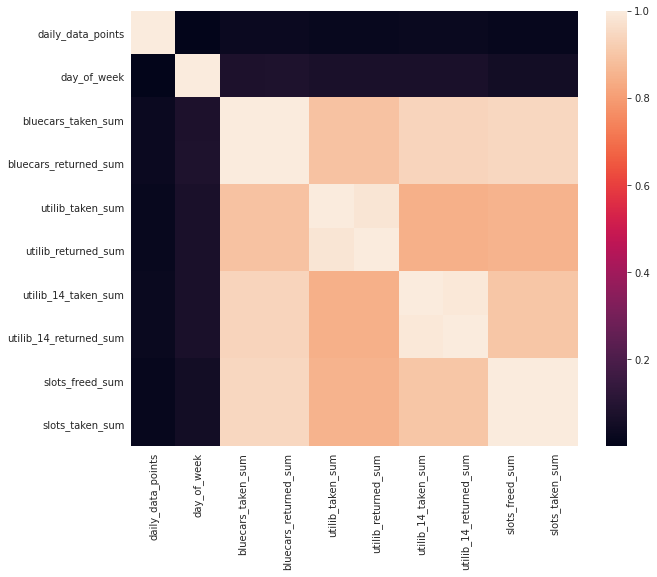

In [ ]:
#correlation matrix

f, ax = plt.subplots(figsize = (10,8))
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

###Tests

In [ ]:
#computing t-test
#importing t-test_1 samp from scipy.stats
from scipy.stats import ttest_ind

#calculating t_test
t_statistic, p_value = ttest_ind(df1['bluecars_taken_sum'], df1['postal_code'])
t_statistic

-1470.0307057452453

#Implementing the solution

##Hypothesis Testing

The aim of this analysis was to investigate the claim that the number of transactions recorded for a given area code reflects to the demand of the blue car in that area code. 

This claim gave rise to the following questions:  

Is it correct to say that the demand for the blue car is higher in area codes that have more number of records and vice versa? If this claim is correct, how do we tell the difference in demand for the blue car where area codes have an equal number of transactions recorded? Do we assume that since the area codes have the same number of transactions recorded then the demand for the blue car is equal in those area codes?

As the data scientist of this company, I would like to investigate the claim and look into these questions. For the sakes of the testing, I will have to use two populations to compare two area codes that have recorded the same number of transactions. Hence I will formulate my hypothesis test as below: 

**Null hypothesis:** The mean number of bluecars taken in area code x is the same as the bluecars taken in area code y

**Alternative hypothesis:** The mean number of bluecars taken in area code x is not the same as the mean number of bluecars taken in area code y

#Sampling
We will select samples from two columns i.e postal_code and day_type. 
The period of interest for this study is over the weekend hence we shall perform a simple random sample on weekend days only. We use simple random sampling as it is easy to use and does not exhibit biasness

In [ ]:
#how many postal codes do we have in total
df1.postal_code.unique()
df1.postal_code.nunique()

#the total number of postal codes recorded is 104 i.e our population

104

In [ ]:
#a breakdown of the number of transactions recorded for each postal code

df1['postal_code'].value_counts()

#some postal codes have the same number of records while others are different
#the highest number of transcations being recorded on a single postal code is 156 while the lowest is 84
#there are a total of 104 different number of postal codes 
#i.e we have a total of 104 different area codes where the company operates

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [ ]:
#we shall perform stratified sampling on postal codes as each postal code has a different number of records
#we shall breakdown the entire population into groups of individual postal codes 
#hence we shall have a total of 104 groups and pick samples from each group
#will obtain a sample from each of the postal codes recorded to avoid picking a biased sample

#performing stratified sampling on postal codes
strat_output = df1.groupby('postal_code', group_keys = False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

print(strat_output['postal_code'].value_counts())

# Check the stratified output
print(strat_output)

#we still have a total of 104 postal codes in our sample hence all postal codes have been represented

92150    16
92380    16
92400    16
94450    16
92410    16
         ..
92360    15
93150    15
93370    15
93200    13
93390     8
Name: postal_code, Length: 104, dtype: int64
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
129          75001 2018-05-24  ...               19               18
152          75001 2018-06-16  ...               35               34
142          75001 2018-06-06  ...               10               11
79           75001 2018-03-24  ...               27               27
58           75001 2018-03-03  ...               27               26
...            ...        ...  ...              ...              ...
16069        95880 2018-06-04  ...                0                0
16082        95880 2018-06-17  ...                0                0
15953        95880 2018-01-25  ...                0                0
15994        95880 2018-03-10  ...                0                0
15997        95880 2018-03-13  ...                0             

In [ ]:
#sampled postal codes df
postal_code_sample = pd.DataFrame(strat_output)
postal_code_sample.head(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
129,75001,2018-05-24,1436,3,weekday,116,116,4,4,8,8,19,18
152,75001,2018-06-16,1440,5,weekend,203,206,7,7,18,18,35,34
142,75001,2018-06-06,1440,2,weekday,109,108,5,5,19,19,10,11


In [ ]:
#sample size
postal_code_sample.shape

#the postal code sample contains 1648 records which is 10% of our entire population

(1648, 13)

In [ ]:
#creating a dataframe where the day type is weekend only from the sample df we have just selected as this is the selected period of interest
weekend_df = postal_code_sample.loc[postal_code_sample['day_type'] == 'weekend']
weekend_df.head(3)

#this will be our sample that we shall use for our test

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
152,75001,2018-06-16,1440,5,weekend,203,206,7,7,18,18,35,34
79,75001,2018-03-24,1440,5,weekend,196,196,11,11,13,13,27,27
58,75001,2018-03-03,1440,5,weekend,192,193,1,1,9,7,27,26


In [ ]:
#previewing the tail of our sample
weekend_df.tail(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16044,95880,2018-04-29,1440,6,weekend,30,26,0,0,2,2,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,1,1,0,0,0,0
15994,95880,2018-03-10,1440,5,weekend,23,22,0,0,1,1,0,0


In [ ]:
#size of our sampe
weekend_df.shape

#our sample now contains 461 records

(461, 13)

In [ ]:
#confirming how many days we are working with
weekend_df['day_type'].value_counts()


weekend    461
Name: day_type, dtype: int64

In [ ]:
#confirming how many area codes we are working with
weekend_df['postal_code'].value_counts()

#we are now down to 102 postal codes out of 104.
#Hence the two postal codes don't have a single transaction recorded over the weekend 
#the number of transactions recorded have also reduced greatly,. 
#This confirms that most transactions were recorded on weekdays rather than the weekend

94220    9
92410    8
94120    8
75017    7
92000    7
        ..
93200    2
75003    2
91370    2
94700    2
93350    2
Name: postal_code, Length: 102, dtype: int64

##Mean, Variance and Standard deviation of our sample

In [ ]:
#obtaining required descriptive statistics for the sample
weekend_df['bluecars_taken_sum'].mean()

161.0997830802603

In [ ]:
weekend_df['bluecars_taken_sum'].var()

55569.65523908333

In [ ]:
weekend_df['bluecars_taken_sum'].std()

235.7321684435184

In [ ]:
weekend_df['bluecars_taken_sum'].max()

1248

In [ ]:
weekend_df['bluecars_taken_sum'].min()

0

In [ ]:
#creating dataframes for the specified area codes i.e recording the same number of transactions
area_code_x = weekend_df.loc[weekend_df['postal_code'] == 75017]
area_code_x.head(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2610,75017,2018-04-28,1440,5,weekend,798,789,22,19,46,50,201,203
2641,75017,2018-06-09,1440,5,weekend,923,949,22,23,74,71,296,304
2649,75017,2018-06-17,1440,6,weekend,729,775,21,20,43,50,163,166


In [ ]:
area_code_x.shape

(7, 13)

In [ ]:
#cumulative sum of bluecars taken from the area code
area_code_x['bluecars_taken_sum'].std()

101.86078267723573

In [ ]:
#mean number of bluecars taken from the area code
area_code_x['bluecars_taken_sum'].mean()

820.5714285714286

In [ ]:
area_code_y = weekend_df.loc[weekend_df['postal_code']== 92000]
area_code_y.head(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
4385,92000,2018-01-20,1439,5,weekend,158,180,9,7,18,18,0,0
4378,92000,2018-01-13,1440,5,weekend,200,184,1,1,11,9,0,0
4413,92000,2018-02-17,1440,5,weekend,233,235,17,17,10,11,0,0


In [ ]:
area_code_y.shape

(7, 13)

In [ ]:
#cumulative sum of bluecars taken from the area code
area_code_y['bluecars_taken_sum'].std()

72.98369028501537

In [ ]:
#mean number of bluecars taken from the area code
area_code_y['bluecars_taken_sum'].mean()

152.57142857142858

###T-test with two sample means

In [ ]:
#calculating the t - critical value and the t-statistic
from scipy.stats import ttest_ind
from scipy import stats
#assigning variables we will work with
n1 = n2 = 7
df = n1-1
mean1 = 820.57
mean2 = 152.57
std1 = 101.86
std2 = 72.98
pop_std = 235.73
pop_mean = 161.099
alpha = (0.05/2)

#step1 1:computing the t-critical value
t_critical = stats.t.ppf(alpha, df)
print('the t_critical is:', t_critical)

#step 2: computing the t_statistic
t_statistic = ((mean1 - mean2) - 0) / (std1/np.sqrt(n1)+ std2/np.sqrt(n2))
print('the t_statistic value is:', t_statistic)

#step 3: Decision and Interpretation
#the t_statistic is greater than the t_critical value hence we reject the null hypothesis
#the test is statistically significant


the t_critical is: -2.446911848791681
the t_statistic value is: 10.108452732733623


##Point Estimation

In [ ]:
#estimating the mean of our bluecars dataset
sample_data = df1['bluecars_taken_sum']
sample_data

#random sampling
sample = sample_data.sample(n=400, replace = 'False')

#sample mean
sample.mean()

#the point estimate changes each time this cell is run
#for this particular analysis, we shall pick the point estimate of 128.55 which varies greatly from our initial mean of 125.926

128.55

##Confidence Interval

In [ ]:
#computing the confidence interval

#step 1: determine our sample 
sample_data = df1['bluecars_taken_sum']
sample_data

#step2:determine the sample mean 
sample_mean = sample_data.mean()
sample_mean

#step 2: sample size
sample_size = df1['bluecars_taken_sum'].shape[0]
sample_size

#step3: finding the standard error of the mean of the data
std_error = sample_data.std() / np.sqrt(sample_size)
std_error

# Calculating the 95% Confidence Interval for mean data  
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 123.061 and 128.79

(123.06139032759609, 128.7925108225438)

###Conclusion and Recommendation

From the hypothesis test, we made the decision to reject the null hypothesis as there was enough evidence to support that the number of blue cars taken in area code x is not the same number of blue cars taken in area code y. For this reason, I recommend that the management should not supply an equal number of bluecars to area codes that have recorded the same number of transactions as this may indeed lead to oversupply or undersupply of the blue cars in these area codes. 

However, it is important to note that this study was conducted for transactions that were only recorded over the weekend, which from the analysis were less than the transactions recorded during weekdays. This could have greatly reduced the sample size and resulted to commiting Type I error. For this reason, it would be best to conduct the test for transactions recorded for weekdays to see if the results would be different.